In [14]:
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt 
import cv2 
import PIL 
from scipy.ndimage import zoom


In [7]:
df_path = "/home/lmeyers/summer_bee_data_reextract/new_open_max_ids_batch1/summer_bee_dataset_open_train_bee_64_ids_batch1_sample_num_64.csv"
df = pd.read_csv(df_path)
df = df[df.columns.to_list()[7:]]
df.head()

img_number  ID   color_id  frame  track  batch  pass environment bee_range  \
0         0.0  10  blue-blue  23895    197      1   NaN      in-lab      1-32   
1         1.0  10  blue-blue  23957    197      1   NaN      in-lab      1-32   
2         2.0  10  blue-blue  23561    196      1   NaN      in-lab      1-32   
3         3.0  10  blue-blue  23608    196      1   NaN      in-lab      1-32   
4         4.0  10  blue-blue  23862    197      1   NaN      in-lab      1-32   

                                            filepath background  reID  \
0  /home/gsantiago/summer_bee_data/summer_bee_dat...       blue    10   
1  /home/gsantiago/summer_bee_data/summer_bee_dat...       blue    10   
2  /home/gsantiago/summer_bee_data/summer_bee_dat...       blue    10   
3  /home/gsantiago/summer_bee_data/summer_bee_dat...       blue    10   
4  /home/gsantiago/summer_bee_data/summer_bee_dat...       blue    10   

   color_num                                       new_filepath  
0          0  /home/lmeyers/summer_bee_data_reextract/images...  
1          0  /home/lmeyers/summer_bee_data_reextract/images...  
2          0  /home/lmeyers/summer_bee_data_reextract/images...  
3          0  /home/lmeyers/summer_bee_data_reextract/images...  
4          0  /home/lmeyers/summer_bee_data_reextract/images...

In [9]:
df_64 = df[df["ID"] == 64]

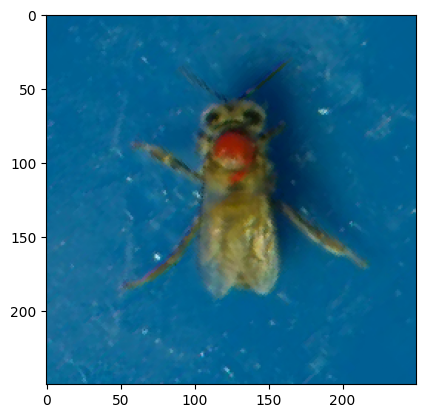

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000684.frame077617.png


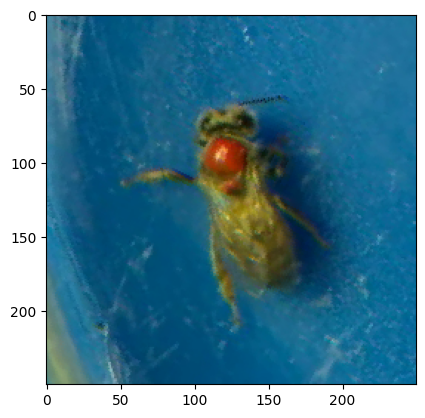

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000683.frame077419.png


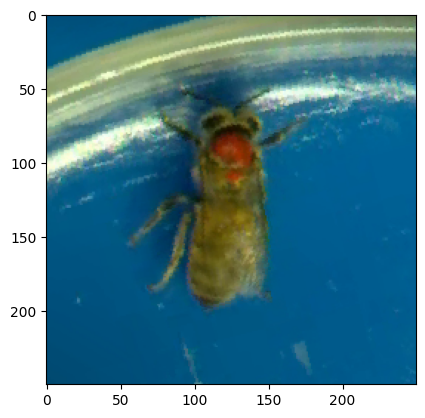

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000684.frame077690.png


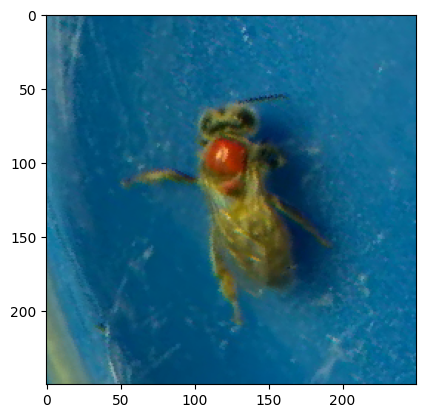

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000683.frame077425.png


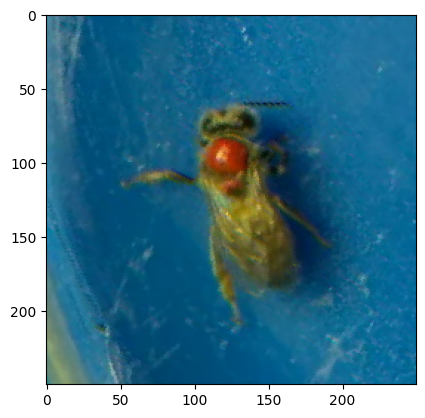

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000683.frame077422.png


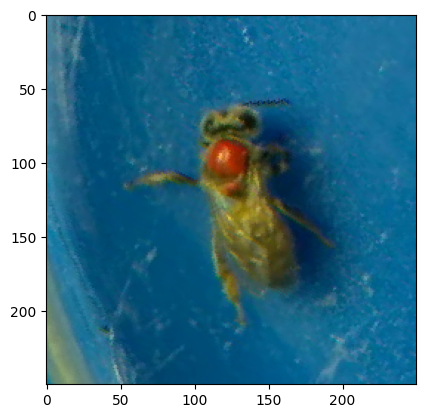

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000683.frame077424.png


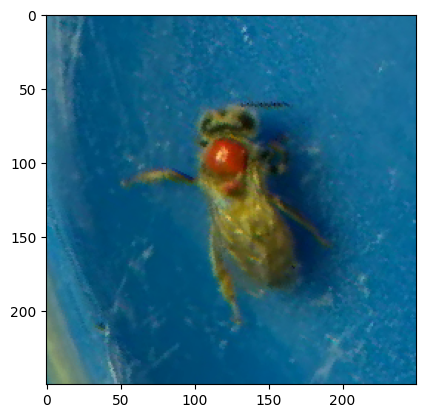

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000683.frame077421.png


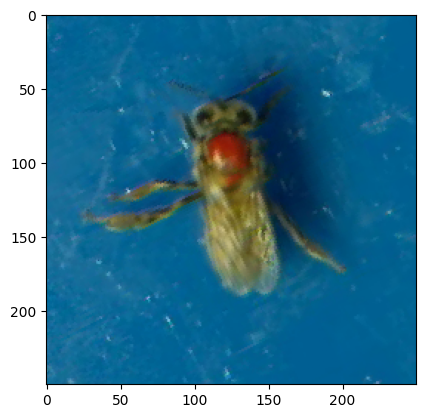

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000684.frame077607.png


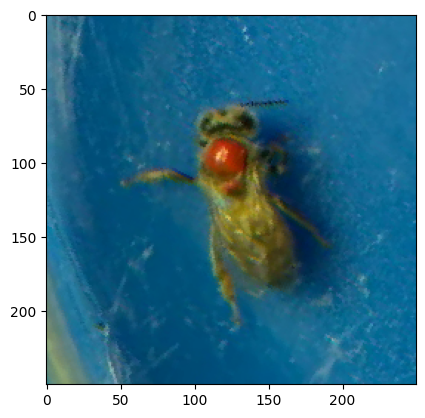

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000683.frame077420.png


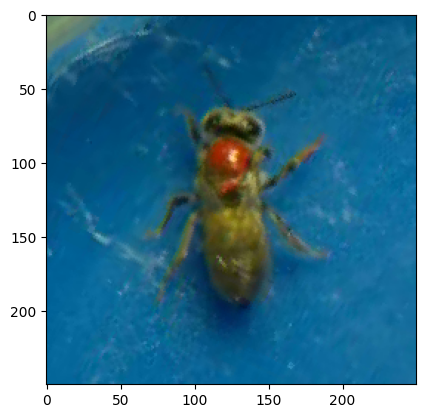

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000683.frame077327.png


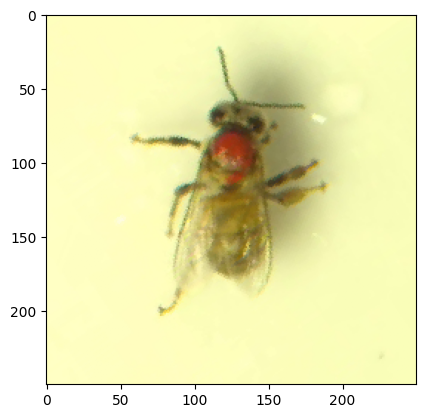

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076843.png


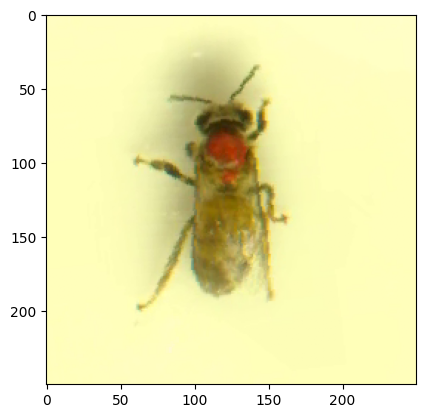

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076920.png


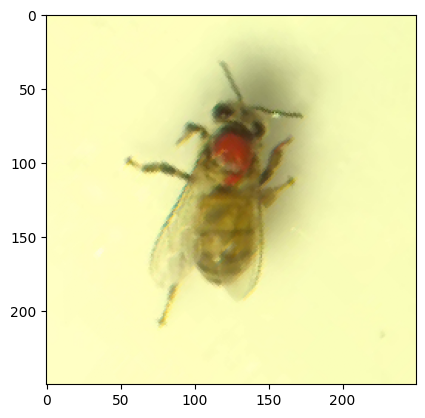

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076851.png


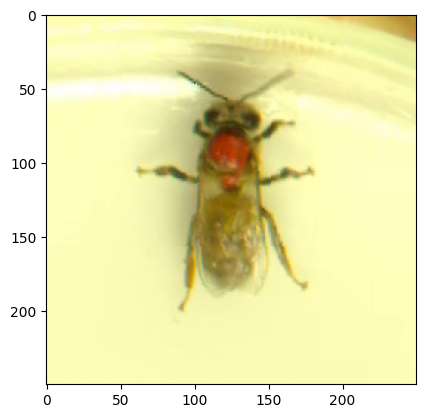

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076953.png


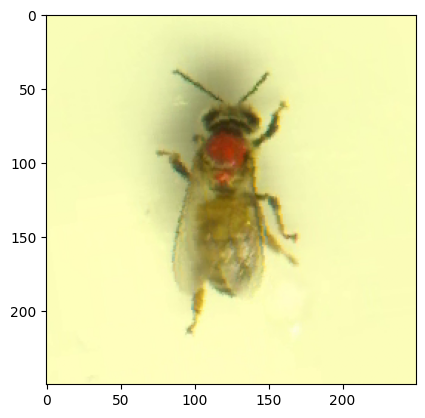

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076900.png


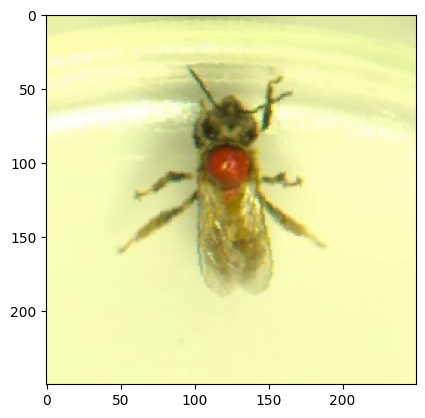

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076983.png


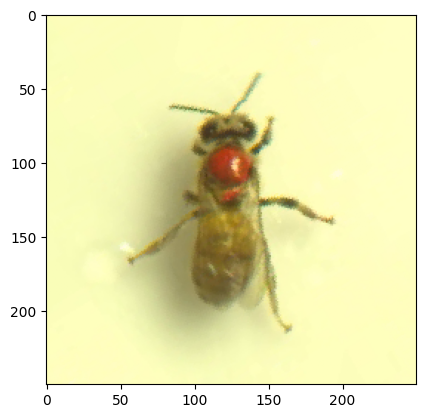

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame077104.png


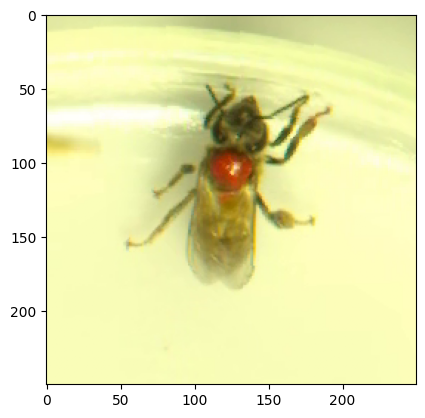

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame077001.png


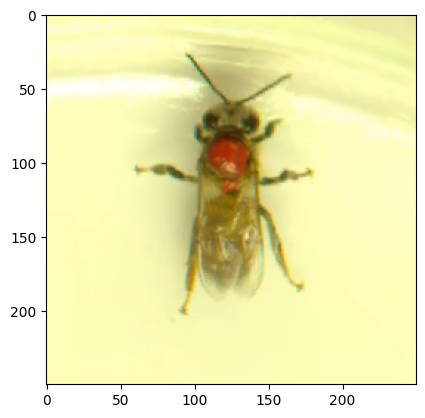

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076963.png


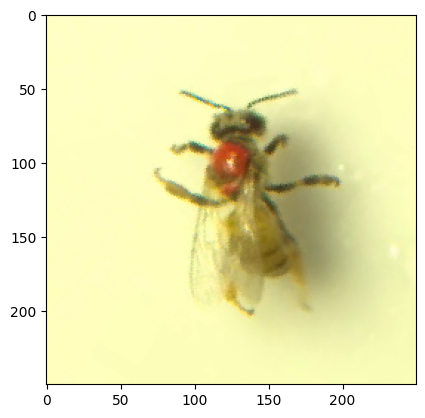

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076817.png


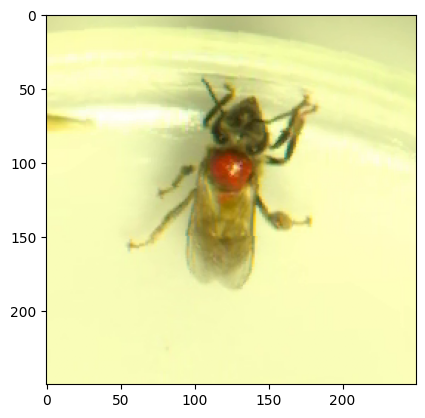

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame077002.png


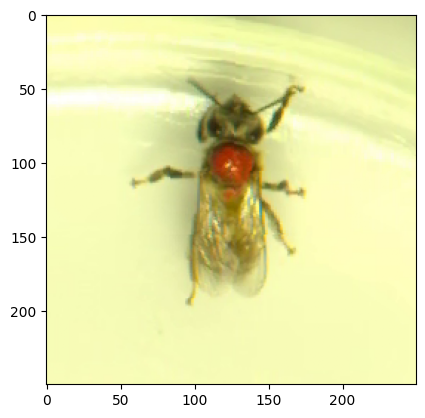

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076979.png


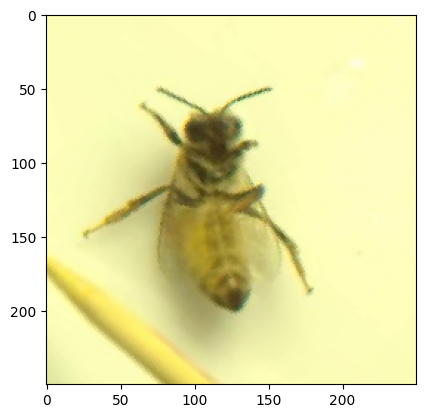

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame077023.png


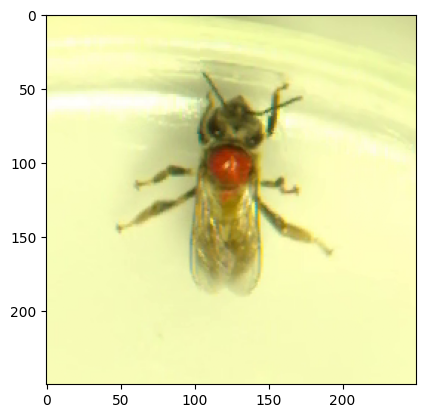

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076984.png


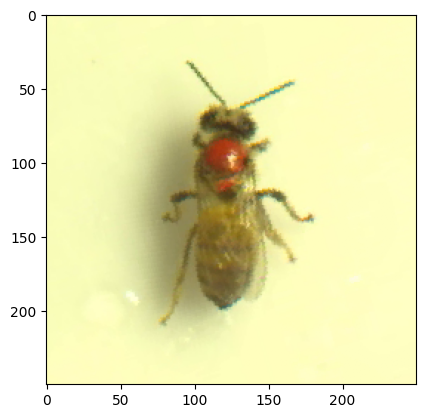

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame077129.png


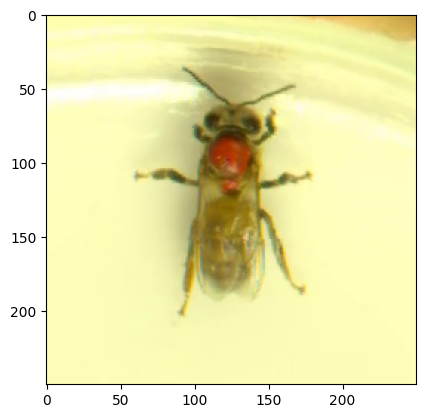

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076957.png


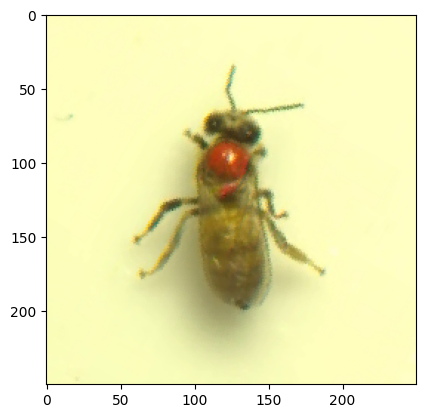

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame077175.png


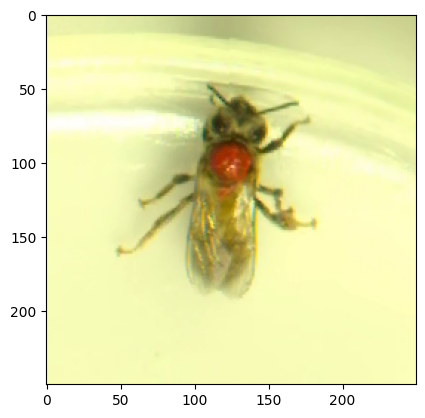

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076989.png


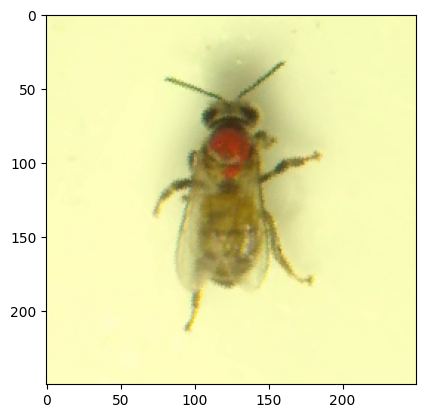

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076871.png


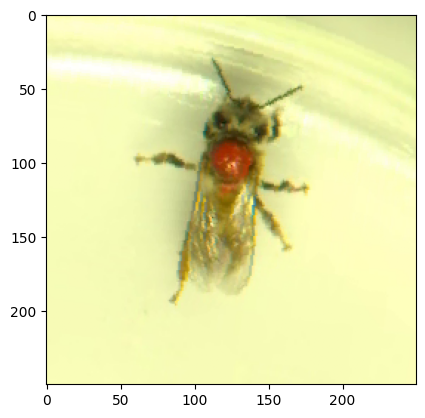

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076973.png


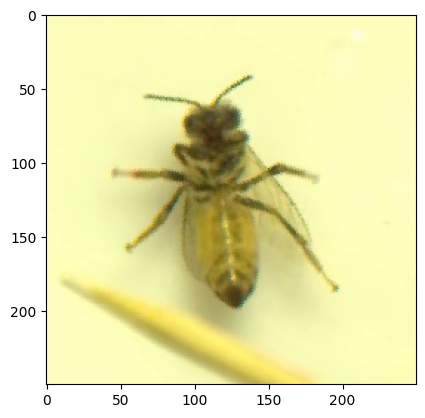

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame077020.png


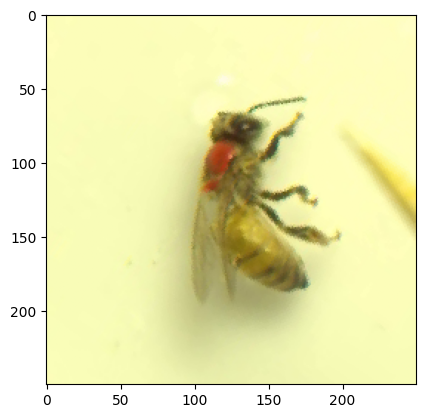

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame077040.png


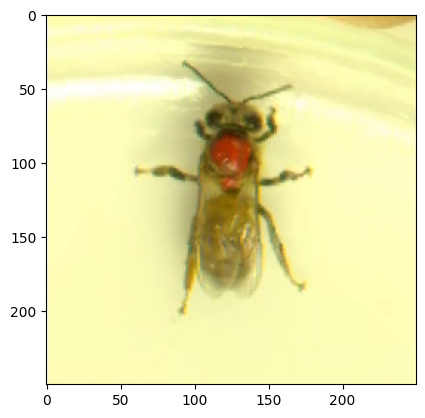

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076959.png


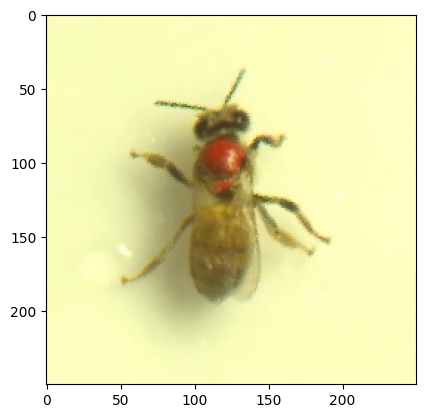

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame077111.png


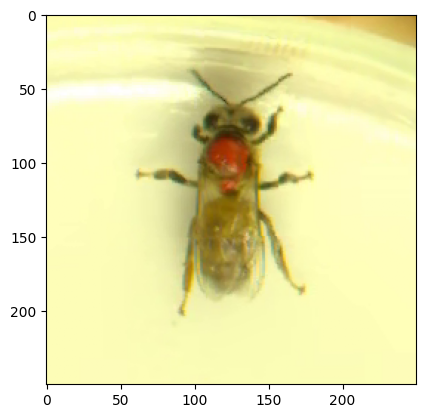

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076955.png


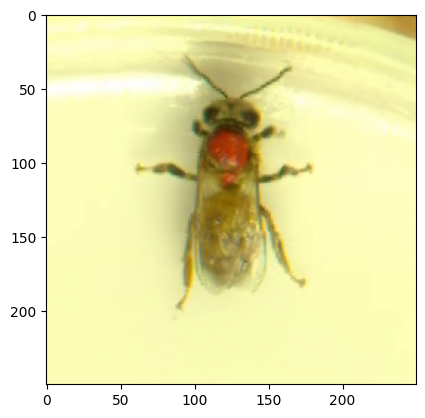

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076952.png


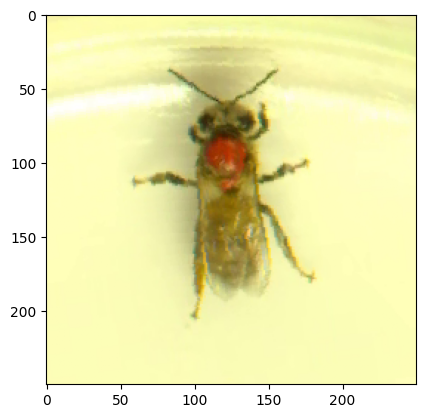

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076960.png


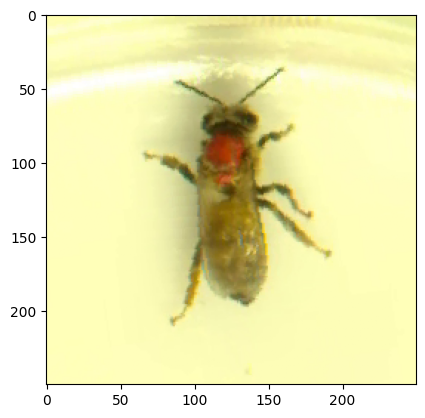

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076941.png


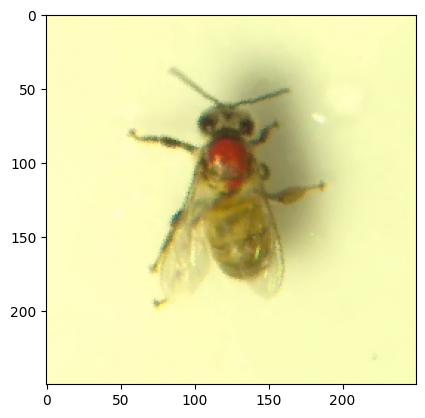

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame076837.png


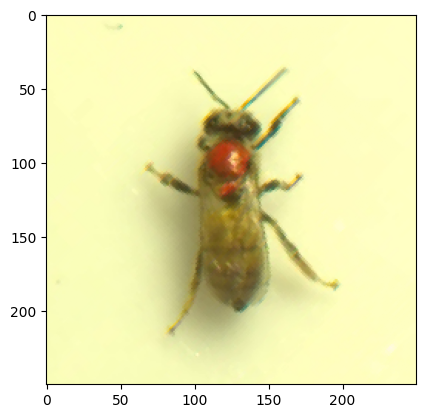

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000674.frame077164.png


In [11]:
for path in df_64['new_filepath']:
    img = plt.imread(path)
    plt.imshow(img)
    plt.show()
    print(path)

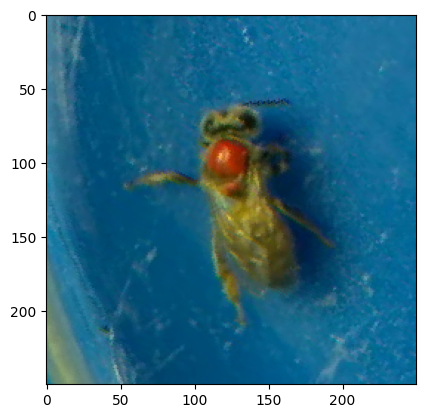

/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000683.frame077424.png


In [13]:
path = "/home/lmeyers/summer_bee_data_reextract/images/young-adults-blue-white-in-lab-33-64_batch_1.mp4.track000683.frame077424.png"
img = plt.imread(path)
plt.imshow(img)
plt.show()
print(path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


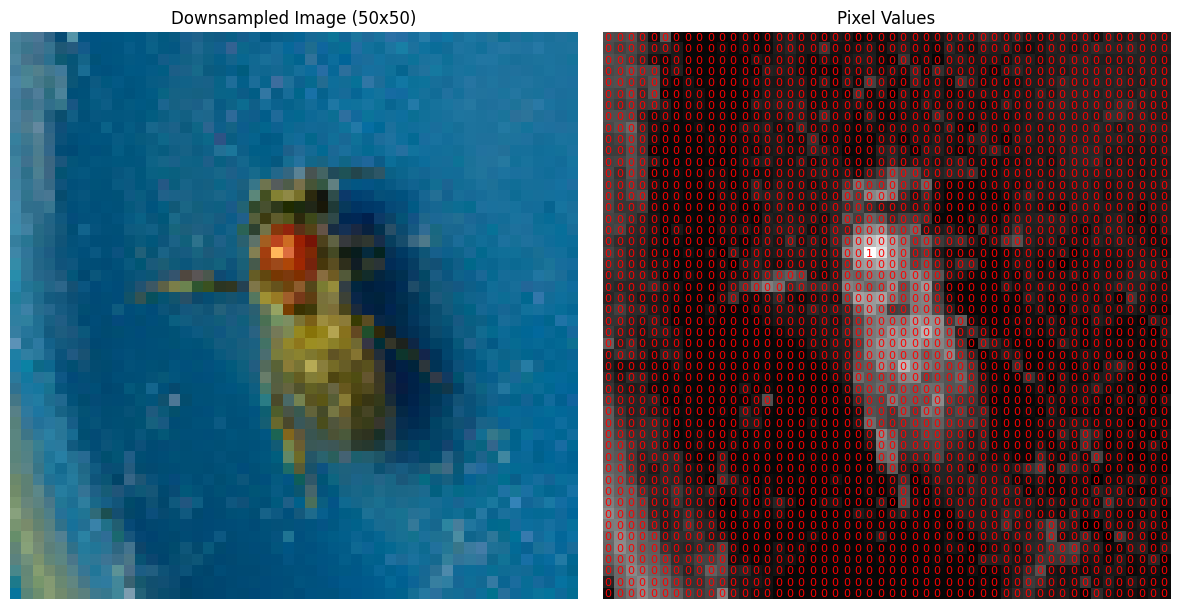

In [19]:
# Example function to downsample image and display both forms
def display_downsampled_image_with_numbers(image, downsample_size=(64, 64)):
    # Check if image is grayscale (2D) or has channels (3D)
    if image.ndim == 3:
        # Apply zoom to each channel separately for RGB images
        zoom_factors = (downsample_size[0] / image.shape[0], downsample_size[1] / image.shape[1], 1)
    else:
        # For grayscale images, only apply zoom to the 2D image
        zoom_factors = (downsample_size[0] / image.shape[0], downsample_size[1] / image.shape[1])

    downsampled_image = zoom(image, zoom_factors)

    # Plotting the downsampled image
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # First plot: the downsampled image
    ax[0].imshow(downsampled_image, cmap='gray' if image.ndim == 2 else None, interpolation='none')
    ax[0].set_title(f'Downsampled Image ({downsample_size[0]}x{downsample_size[1]})')
    ax[0].axis('off')

    # Second plot: the numerical matrix (for the first channel if RGB)
    img_to_display = downsampled_image if image.ndim == 2 else downsampled_image[..., 0]
    ax[1].imshow(img_to_display, cmap='gray', interpolation='none')
    ax[1].set_title('Pixel Values')
    for i in range(downsample_size[0]):
        for j in range(downsample_size[1]):
            ax[1].text(j, i, int(img_to_display[i, j]), ha='center', va='center', color='red', fontsize=8)

    ax[1].axis('off')

    plt.tight_layout()
    plt.show()


# Call the function with your desired downsample size
display_downsampled_image_with_numbers(img, downsample_size=(50, 50))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


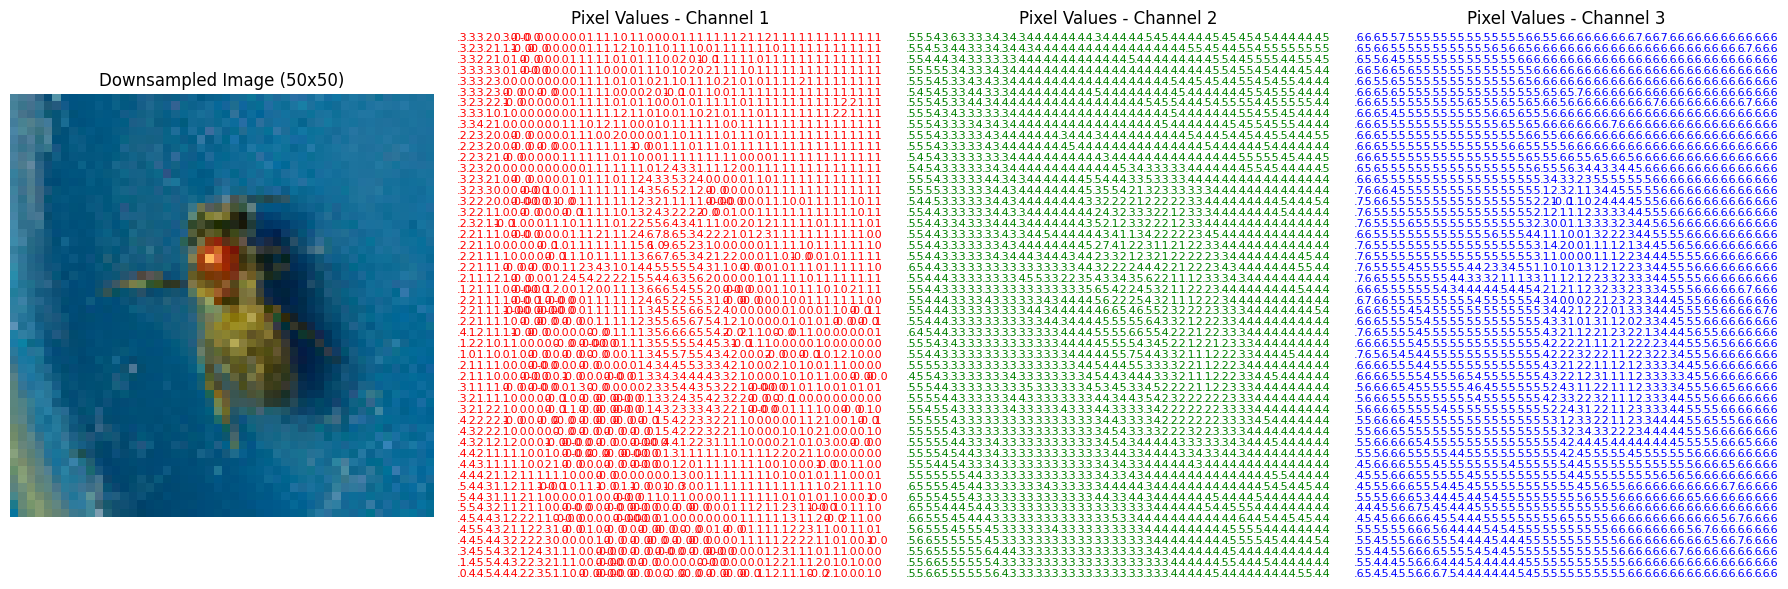

In [24]:

# Function to display downsampled image and the pixel values for each channel
def display_downsampled_image_with_numbers(image, downsample_size=(64, 64)):
    # Check if image is grayscale (2D) or has channels (3D)
    if image.ndim == 3:
        # Apply zoom to each channel separately for RGB images
        zoom_factors = (downsample_size[0] / image.shape[0], downsample_size[1] / image.shape[1], 1)
    else:
        # For grayscale images, only apply zoom to the 2D image
        zoom_factors = (downsample_size[0] / image.shape[0], downsample_size[1] / image.shape[1])

    downsampled_image = zoom(image, zoom_factors)

    # Prepare the figure: if RGB, we need one subplot per channel
    if image.ndim == 3:
        num_channels = image.shape[2]
        fig, ax = plt.subplots(1, num_channels + 1, figsize=(18, 6))
    else:
        num_channels = 1
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # First plot: the downsampled image
    ax[0].imshow(downsampled_image, interpolation='none')
    ax[0].set_title(f'Downsampled Image ({downsample_size[0]}x{downsample_size[1]})')
    ax[0].axis('off')

    # Iterate over each channel (for RGB) or just one plot (for grayscale)
    for ch in range(num_channels):
        img_to_display = downsampled_image if image.ndim == 2 else downsampled_image[..., ch]
        
        # Create the subplot for each channel's pixel values
        #ax[ch + 1].imshow(img_to_display, cmap='gray', interpolation='none')
        ax[ch + 1].set_title(f'Pixel Values - Channel {ch + 1}' if image.ndim == 3 else 'Pixel Values')
        
        # Set the axis limits manually to ensure the numbers are displayed in the correct grid
        ax[ch + 1].set_xlim(-0.5, downsample_size[1] - 0.5)
        ax[ch + 1].set_ylim(downsample_size[0] - 0.5, -0.5)
        # Plot the float values with 1 digit precision
        for i in range(downsample_size[0]):
            for j in range(downsample_size[1]):
                value = img_to_display[i, j]
                 # For RGB, set color based on the channel
                if image.ndim == 3:
                    color = ['red', 'green', 'blue'][ch]
                else:
                    color = 'red'  # Use red for grayscale
                 # Display only the decimal part
                ax[ch + 1].text(j, i, f'{value:.1f}'.lstrip('0'), 
                                ha='center', va='center', color=color, fontsize=8)

        ax[ch + 1].axis('off')

    plt.tight_layout()
    plt.show()



# Call the function with your desired downsample size
display_downsampled_image_with_numbers(img, downsample_size=(50, 50))
